In [ ]:
!pip install nbimporter

In [ ]:
!pip install import-ipynb

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [84]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
%run /content/Stock_Prediction_using_LSTM(Model_Building_and_Training)ipynb.ipynb

Sequences created successfully.
LSTM model built successfully.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0602 - val_loss: 0.0067
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.4064e-04 - val_loss: 0.0034
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3468e-04 - val_loss: 0.0033
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0070e-04 - val_loss: 0.0035
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.2626e-04 - val_loss: 0.0029
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.4022e-04 - val_loss: 0.0028
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.8837e-04 - val_loss: 0.0025
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.1377e-04 - val_loss: 0.0024
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0730e-04 - val_loss: 0.0022
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.2203e-04 - val_loss: 0.0021
Epoch 12/100
38/38 ━━━━━━━━━━━━━

In [73]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test, scaler, features):
    try:
        y_pred = model.predict(X_test)

        # Inverse transform to get original scale
        y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], len(features) - 1))), axis=1))[:, 0]
        y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], len(features) - 1))), axis=1))[:, 0]

        mse = mean_squared_error(y_test_inv, y_pred_inv)
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        rmse = np.sqrt(mse)

        print(f"Model Performance:")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    except Exception as e:
        print(f"Error in evaluating model: {e}")

In [94]:
# Function to predict the next day's closing price
# def predict_next_day(model, df, scaler, features, n_steps=10):
#     try:
#         last_sequence = df[features].values[-n_steps:]
#         last_sequence = np.expand_dims(last_sequence, axis=0)
#         next_day_prediction = model.predict(last_sequence)
#         next_day_prediction_inv = scaler.inverse_transform(np.concatenate((next_day_prediction, np.zeros((next_day_prediction.shape[0], len(features) - 1))), axis=1))[:, 0]
#         print(f"Predicted Closing Price for the Next Day: {next_day_prediction_inv:.2f}")
#     except Exception as e:
#         print(f"Error in predicting next day price: {e}")

def predict_next_day(model, X_train, X_test):
  try:
      next_day_predictions_for_train_dataset = model.predict(X_train)
      next_day_predictions_for_test_dataset = model.predict(X_test)
      next_day_predictions_for_train_dataset_inv = scaler.inverse_transform(np.concatenate((next_day_predictions_for_train_dataset, np.zeros((next_day_predictions_for_train_dataset.shape[0], len(features) - 1))), axis=1))[:, 0]
      #next_day_predictions_for_train_dataset_inv = scaler.inverse_transform(next_day_predictions_for_train_dataset)
      next_day_predictions_for_test_dataset_inv = scaler.inverse_transform(np.concatenate((next_day_predictions_for_test_dataset, np.zeros((next_day_predictions_for_test_dataset.shape[0], len(features) - 1))), axis=1))[:, 0]
      #next_day_predictions_for_test_dataset_inv = scaler.inverse_transform(next_day_predictions_for_test_dataset)


      # Format each element individually
      formatted_predictions_for_train_dataset = [f"{value:.2f}" for value in next_day_predictions_for_train_dataset_inv]
      formatted_predictions_for_test_dataset = [f"{value:.2f}" for value in next_day_predictions_for_test_dataset_inv]

      # Print the formatted predictions
      print("Predicted Closing Prices for Next Day (For train dataset):", ", ".join(formatted_predictions_for_train_dataset))
      # print(next_day_predictions_for_train_dataset_inv.shape)
      print("Predicted Closing Prices for Next Day (For test dataset):", ", ".join(formatted_predictions_for_test_dataset))
      # print(next_day_predictions_for_test_dataset_inv.shape)

      return next_day_predictions_for_test_dataset_inv

  except Exception as e:
      print(f"Error in predicting next day price: {e}")


In [102]:
def plot_actual_vs_predicted(y_test, next_day_predictions_for_test_dataset):
  try:
      # Ensure y_test is a 2D array for inverse transformation
      if y_test.ndim == 1:
          y_test = y_test[:, np.newaxis]

      # Ensure next_day_predictions_for_test_dataset is 2D if needed
      if next_day_predictions_for_test_dataset.ndim == 1:
          next_day_predictions_for_test_dataset = next_day_predictions_for_test_dataset[:, np.newaxis]

      # Plot the actual values and predicted values
      plt.figure(figsize=(12, 6))

      # Inverse transform the actual values of y_test
      y_test_inv = scaler.inverse_transform(np.concatenate((y_test, np.zeros((y_test.shape[0], len(features) - 1))), axis=1))[:, 0]

      # Plot actual values
      plt.plot(y_test_inv, label='Actual Values', color='green', linestyle='-', marker='o')

      # Plot predicted values
      plt.plot(next_day_predictions_for_test_dataset, label='Predicted Values', color='red', linestyle='--', marker='x')

      plt.title('Actual vs. Predicted Closing Prices for Test Dataset')
      plt.xlabel('Sample Index')
      plt.ylabel('Price')
      plt.legend()
      plt.grid(True)
      plt.tight_layout()
      plt.show()
  except Exception as e:
      print(f"Error in plotting actual vs. predicted: {e}")


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Model Performance:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.01
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted Closing Prices for Next Day (For train dataset): 0.05, 0.06, 0.08, 0.09, 0.09, 0.09, 0.08, 0.09, 0.08, 0.09, 0.09, 0.10, 0.11, 0.10, 0.08, 0.10, 0.11, 0.11, 0.11, 0.11, 0.10, 0.12, 0.12, 0.13, 0.13, 0.14, 0.14, 0.13, 0.15, 0.15, 0.15, 0.15, 0.14, 0.14, 0.14, 0.15, 0.15, 0.14, 0.14, 0.11, 0.10, 0.10, 0.10, 0.10, 0.11, 0.13, 0.11, 0.12, 0.12, 0.13, 0.12, 0.11, 0.10, 0.08, 0.10, 0.10, 0.10, 0.10, 0.10, 0.11, 0.13, 0.14, 0.14, 0.15, 0.17, 0.18, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.19, 0.19, 0.17, 0.17, 0.16, 0.23, 0.24, 0.24, 0.25, 0.26, 0.27, 0.26, 0.27, 0.27, 0.27, 0.28, 0.28, 0.26, 0.25, 0.26, 0.26, 0.26, 0.24, 0.24, 0.24, 0.24, 0.24, 0.23, 0.24, 0.24, 0.22, 0.23, 0.24, 0.20, 0.18, 0.19, 0.17, 0.17, 0.18, 0.18, 0.18, 0.19, 0

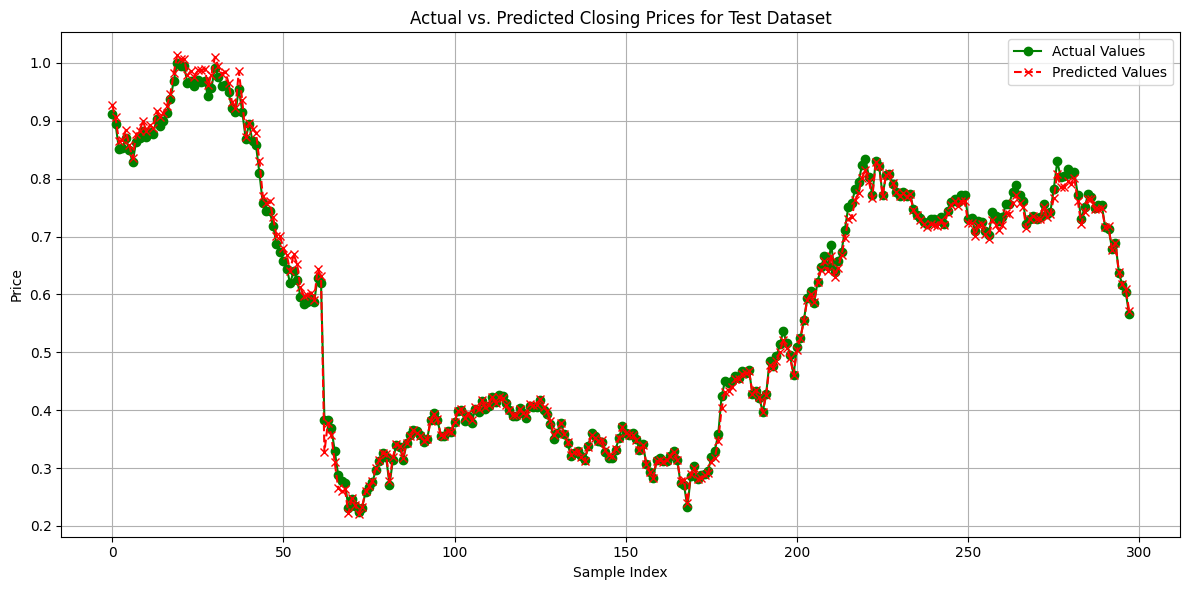

In [103]:
preprocessed_stock_data = pd.read_csv('/content/preprocessed_stock_data.csv')
# Define the features
features = preprocessed_stock_data.columns.tolist()

# Initialize and fit scaler
scaler = MinMaxScaler()
scaler.fit(df[features])

# Load model
model = load_model('/content/lstm_stock_price_model.keras')

# Prepare test data
# X, y = create_sequences(df, features, target)
# train_size = int(len(X) * 0.8)
# X_test, y_test = X[train_size:], y[train_size:]

# Evaluate the model
evaluate_model(model, X_test, y_test, scaler, features)

# Predict the next day's closing price
next_day_predictions_for_test_dataset = predict_next_day(model, X_train, X_test)

# Plot actual vs. predicted
plot_actual_vs_predicted(y_test, next_day_predictions_for_test_dataset)